In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
df=pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# EDA UNIVARIATE:
Univariate analysis ka matlab hai "single variable" ka analysis karna. Yaani, hum dataset ke sirf ek column (variable) ko study karte hain taaki uska distribution, central tendency, aur variability ko samajh sakein.

1. # Categorical Data Ke Liye
Agar variable categorical hai (jaise gender, city, product type), toh in techniques ka use hota hai:

✅ Frequency Table → Har category ki count
✅ Mode → Sabse zyada baar aane wala category
✅ Proportions & Percentages → Category distribution
✅ Visualizations:

Bar Chart → Categories ke frequency dikhata hai

Pie Chart → Percentage share dikhata hai

In [77]:
df['Age'].mode()

0    24.0
Name: Age, dtype: float64

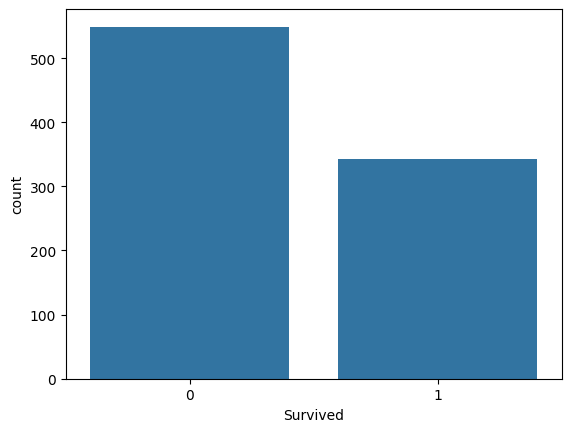

In [78]:
# categorical data:-
# countplot plot:to check how many peole survive
sns.countplot(x=df['Survived'])
plt.show()

In [79]:
# to see the exact number of people survide:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

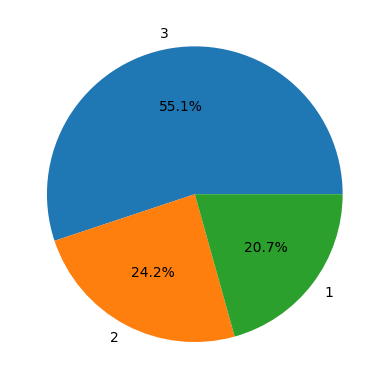

In [80]:
# pieplot
labels=['3','2','1']
x=df["Pclass"].value_counts()
plt.pie(x,autopct='%1.1f%%',labels=labels)
plt.show()

In [81]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

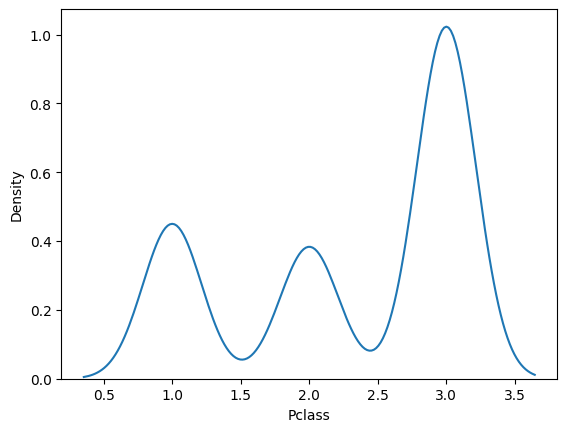

In [82]:
# kde(kernel density estimation plot)
sns.kdeplot(df['Pclass'])
plt.show()

Numerical data

Univariate Analysis Ke Techniques
1. # Numerical (Continuous) Data Ke Liye
Agar variable numerical hai (jaise age, salary, height), toh hum in techniques ka use kar sakte hain:

✅ Measures of Central Tendency:

Mean (Average) = Sum of all values / Total values

Median = Middle value

Mode = Most frequent value

✅ Measures of Dispersion (Spread):

Range = Max - Min

Variance = Spread of data points

Standard Deviation (SD) = Square root of variance

✅ Visualizations:

Histogram → Data distribution ko dikhata hai

Boxplot → Outliers, median, quartiles dikhata hai

Density Plot → Smooth curve of distribution dikhata hai



# Central Tendency

In [83]:

df['Age'].median()
df['Age'].mode()
df['Age'].mean()

29.69911764705882

# Measure of Dispersion

In [84]:
max_age=df['Age'].max()
min_age=df['Age'].min()
range=max_age-min_age
print("range of age:",range)

range of age: 79.58


In [85]:
# variance
df['Age'].var()

211.01912474630802

In [86]:
# standard deviation
df['Age'].std()

14.526497332334042

In [87]:
q1=np.percentile(df['Age'],25)
q3=np.percentile(df['Age'],75)
print(q1)
iqr=q3-q1
print(iqr)

nan
nan


In [88]:
data=df['Age']
mean_new=df['Age'].mean()
print("mean:",mean_new)
mean_difference=[(x -mean_new)**2 for x in data]
variance=sum(mean_difference)/(len(data)-1)
std=variance**0.5
print(std)
print(variance)

mean: 29.69911764705882
nan
nan


In [89]:
df['Age'].isnull().sum()

177

In [90]:
data=df['Age'].dropna()

In [91]:
# df['Age'].isnull().sum()
data.isnull().sum()

0

In [92]:
data = data  # NaN values hatao

# Step 1: Calculate Mean
mean_value = sum(data) / len(data)

# Step 2: Calculate Squared Differences from Mean
squared_diff = [(x - mean_value) ** 2 for x in data]

# Step 3: Calculate Variance (n-1 for sample variance)
variance = sum(squared_diff) / (len(data) - 1)

# Step 4: Standard Deviation (Square Root of Variance)
std_dev = variance ** 0.5

print("Mean:", mean_value)
print("Variance:", variance)
print("Standard Deviation:", std_dev)


Mean: 29.69911764705882
Variance: 211.01912474630805
Standard Deviation: 14.526497332334042


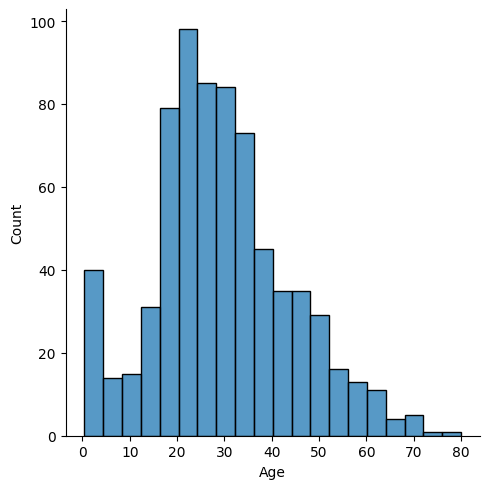

In [93]:
# Displot
sns.displot(df['Age'])
plt.show()

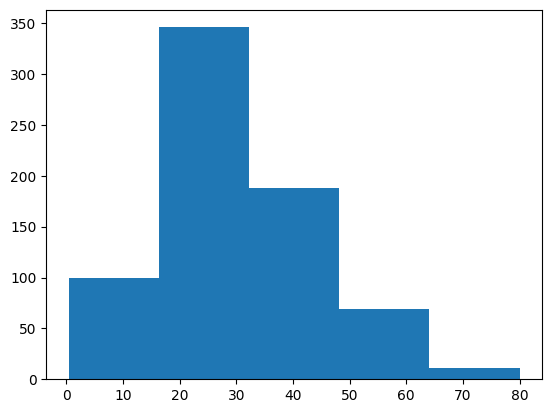

In [94]:
# Histogram plot
plt.hist(df['Age'],bins=5)
plt.show()
# using matplotlib

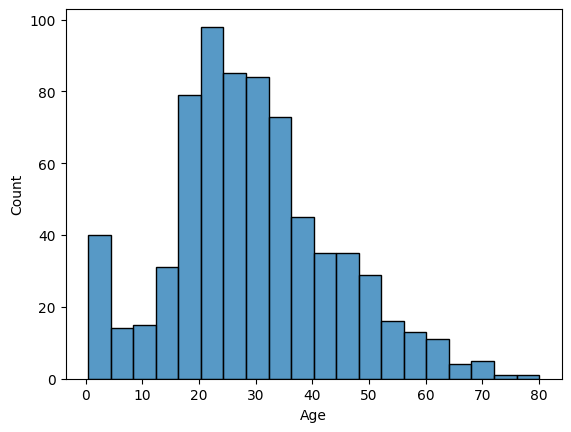

In [95]:
sns.histplot(df['Age'])
plt.show()
# using the seaborn

<Axes: ylabel='Age'>

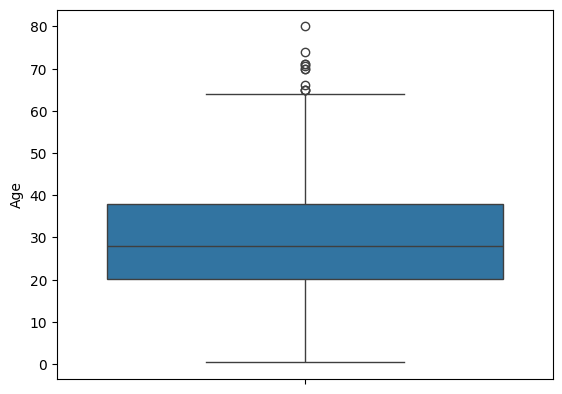

In [96]:
# boxplot
sns.boxplot(df['Age'])

In [97]:
df['Age'].min()

0.42

In [98]:
df['Age'].max()

80.0

In [99]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [100]:
df['Age'].mean()

29.69911764705882

df['Age'].skew() ka use skewness nikalne ke liye hota hai, jo data distribution ka asymmetry (मतलब data left ya right taraf zyada tilted hai ya nahi) batata hai.
Skewness > 0 → Right-skewed

Skewness < 0 → Left-skewed

Skewness ≈ 0 → Symmetric

In [101]:
df['Age'].skew()

0.38910778230082704